In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [3]:
drive.mount('/content/drive')
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/samsung.csv')
df.head()
print(df.iloc[0,0])
df = df.iloc[:,1:]
df.head()

Mounted at /content/drive
2022-11-22


,close,start,high,low,volume,transactionPrice,capitalization
0,60600,60900,61200,60300,9411289,5.714610e+11,3.617690e+14
1,61400,61400,61800,60800,9378097,5.737830e+11,3.665450e+14
2,61800,61800,62400,61400,12236503,7.574550e+11,3.689330e+14
3,61400,62000,62000,61300,13298296,8.191190e+11,3.665450e+14
4,62700,62400,62700,61700,12909260,8.042200e+11,3.743050e+14


In [4]:
scaler = MinMaxScaler()
scaler.fit(df)#훑어봐줌
asset_scaled = scaler.transform(df)#열별로 정규화 해줌
assetscaled = pd.DataFrame(scaler.transform(df))

print(assetscaled)
print(f"최소\n{assetscaled.min()}")
print(f"최대\n{assetscaled.max()}")

scaler1 = MinMaxScaler()

scaler1.fit_transform(df['close'].values.reshape(-1,1))
#rescaled_actual = scaler1.inverse_transform(df['close'].values.reshape(-1,1))

#rescaled_pred = scaler1.inverse_transform(np.array(pred).reshape(-1,1))

            0         1         2         3         4         5         6
0    0.286738  0.303887  0.279412  0.299296  0.113235  0.100030  0.286738
1    0.315412  0.321555  0.301471  0.316901  0.112203  0.101046  0.315413
2    0.329749  0.335689  0.323529  0.338028  0.201041  0.181389  0.329751
3    0.315412  0.342756  0.308824  0.334507  0.234042  0.208362  0.315413
4    0.362007  0.356890  0.334559  0.348592  0.221950  0.201845  0.362004
..        ...       ...       ...       ...       ...       ...       ...
243  0.706093  0.749117  0.753676  0.711268  0.224840  0.263153  0.706093
244  0.756272  0.805654  0.790441  0.767606  0.211073  0.256676  0.756274
245  0.795699  0.837456  0.830882  0.785211  0.307203  0.363683  0.795702
246  0.813620  0.837456  0.823529  0.799296  0.505394  0.574749  0.813624
247  0.799283  0.742049  0.794118  0.746479  0.675631  0.745568  0.799287

[248 rows x 7 columns]
최소
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64
최대
0   

array([[0.28673835],
       [0.31541219],
       [0.3297491 ],
       [0.31541219],
       [0.36200717],
       [0.35125448],
       [0.33333333],
       [0.36917563],
       [0.27956989],
       [0.33691756],
       [0.3297491 ],
       [0.27240143],
       [0.2437276 ],
       [0.23655914],
       [0.25089606],
       [0.26523297],
       [0.2437276 ],
       [0.16845878],
       [0.24731183],
       [0.2437276 ],
       [0.1827957 ],
       [0.17562724],
       [0.11827957],
       [0.10394265],
       [0.11469534],
       [0.13978495],
       [0.14336918],
       [0.13261649],
       [0.09318996],
       [0.11469534],
       [0.10035842],
       [0.12903226],
       [0.13261649],
       [0.1218638 ],
       [0.09318996],
       [0.01792115],
       [0.        ],
       [0.01075269],
       [0.05734767],
       [0.04659498],
       [0.06810036],
       [0.06451613],
       [0.09677419],
       [0.11469534],
       [0.13620072],
       [0.12903226],
       [0.1218638 ],
       [0.150

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 4s 165ms/step - loss: 0.0811 - accuracy: 0.0068 - val_loss: 0.0682 - val_accuracy: 0.0000e+00
Epoch 2/200
5/5 [========================

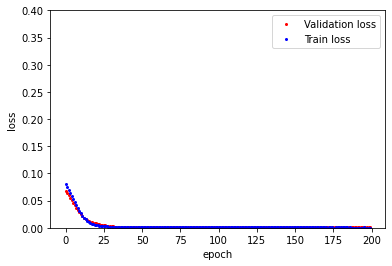

In [5]:
X = assetscaled.iloc[:, 1:7]
y = assetscaled.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
# model structure design

modelpath = './drive/MyDrive/Colab Notebooks/data/model/best_stock_pre.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss') 
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)



model = Sequential()
model.add(Dense(10, input_dim = 6, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))#과제에서 준 node개수 입력 그런데 너무 과할지도??
model.summary()
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 200, batch_size = 30, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer]) # 60:20:20
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0], 'Test accuracy:', score[1])
#accuracy는 소수점을 정확하게 맞춰야하는데 그건오히려 과적합 따라서 0.00000대로나옴

hist_df = pd.DataFrame(history.history)
#print(hist_df)
y_val_loss = hist_df['val_loss']
y_train_loss = hist_df['loss']
x_len = np.arange(len(y_train_loss))
plt.plot(x_len, y_val_loss, 'o', c = 'red', markersize = 2, label = 'Validation loss')
plt.plot(x_len, y_train_loss, 'o', c = 'blue', markersize = 2, label = 'Train loss')
plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0,0.4 ])
plt.show()


In [ ]:
Y_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

2/2 [==============================] - 0s 5ms/step
Real price: 0.11469534050179209, Expected price: 0.1311708390712738
Real price: 0.4444444444444444, Expected price: 0.43931034207344055
Real price: 0.5053763440860213, Expected price: 0.5114437341690063
Real price: 0.9605734767025089, Expected price: 0.8937534093856812
Real price: 0.8315412186379929, Expected price: 0.8241928219795227
Real price: 0.6917562724014334, Expected price: 0.7142972350120544
Real price: 0.2939068100358424, Expected price: 0.2924509048461914
Real price: 0.6308243727598566, Expected price: 0.6427279710769653
Real price: 0.7670250896057349, Expected price: 0.7941111922264099
Real price: 0.9211469534050181, Expected price: 0.8847904205322266
Real price: 0.6129032258064517, Expected price: 0.6258270144462585
Real price: 0.31182795698924726, Expected price: 0.30505403876304626
Real price: 0.3261648745519714, Expected price: 0.31632429361343384
Real price: 0.6164874551971324, Expected price: 0.6355848908424377
Real p

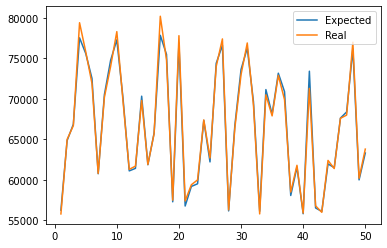

In [6]:
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(len(X_test)):
  real = y_test[i]
  prediction = Y_prediction[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)
import numpy as np
real_prices = scaler1.inverse_transform(np.array(real_prices).reshape(-1,1)) #노멀라이징 된 예측값을 원래 주가로 돌려주기 위함이다.
pred_prices = scaler1.inverse_transform(np.array(pred_prices).reshape(-1,1))


plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show()
